## <a id='toc1_1_'></a>[Exemplo de aplicação: compressão de imagens utilizando decomposição em valores singulares (SVD)](#toc0_)

Este arquivo .ipynb deve ser utilizado para realizar a Parte II da atividade sobre autovalores e autovetores da disciplina de Cálculo Avançado. O objetivo aqui consiste em utilizar SVD - uma técnica que se baseia na identificação dos autovalores e autovetores de uma matriz- para comprimir imagens. Mais informações sobre SVD podem ser conferidas no pdf fornecido junto com este arquivo.

In [20]:
#Importação das bibliotecas de interesse:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import math
import os
from PIL import Image

In [21]:
# Vamos especificar o nome do arquivo cuja imagem iremos ler, bem como o formato utilizado (no caso, jpg) e o local onde o arquivo está salvo (modifique de acordo com
# o local onde você vá salvar o arquivo na sua máquina). 

nome_do_arquivo = '8' #Você deve alterar o nome conforme o último algarismo do seu RA.
formato = '.jpg'
local = "" #Obs.: barras invertidas (\) devem ser substituídas por barras (/) ao especificar o local.

# <a id='toc2_'></a>[Representação matricial da imagem selecionada](#toc0_)

Usando o módulo matplotlib.image, vamos ler o arquivo .jpg, e representá-la matricialmente:

In [22]:
# Cada célula da matriz corresponde a um pixel da imagem, em escala de cinza (preto corresponde ao valor 0, branco corresponde
# ao valor de 255). A seguir, estamos imprimindo a matriz:
X = imread(local+nome_do_arquivo+formato)
print("X = ", np.matrix(X))

X =  [[127 123 125 ... 165 170 166]
 [128 126 127 ... 169 163 167]
 [128 124 128 ... 178 160 175]
 ...
 [111 112 115 ... 101  97 104]
 [110 112 117 ... 104  93 106]
 [113 115 121 ... 102  95  97]]


Vamos visualizar aqui a imagem sendo carregada:

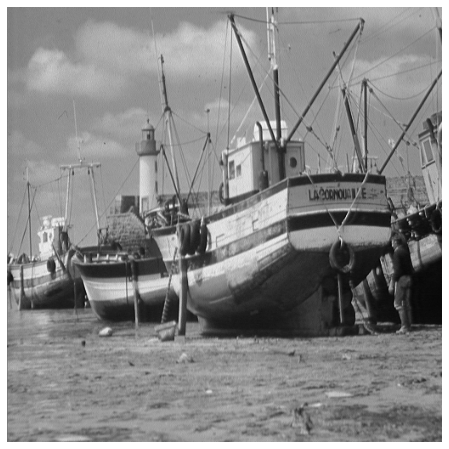

In [23]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.figure()
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

## <a id='toc2_1_'></a>[Decomposição em Valores Singulares:](#toc0_)

Vamos agora calcular a decomposição da matriz X em valores singulares (SVD). As matrizes U, S e V correspondem às matrizes de mesmo nome explicadas nas instruções referentes a esta atividade.

In [24]:
U, S, V = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

Note que a matriz S é diagonal (ou seja, todos os elementos são iguais a zero, exceto aqueles na diagonal principal):

In [25]:
print(np.matrix(S))

[[6.81841765e+04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.31833733e+03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.02336882e+03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.19892844e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.90127960e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.86314284e-02]]


Vamos ver o número total de valores singulares em S:

In [26]:
numero_total_de_valores_singulares = len(S)

A diagonal principal de S é dada por:

In [27]:
print(np.diag(S))

[6.81841765e+04 8.31833733e+03 7.02336882e+03 4.96600610e+03
 4.84445695e+03 4.67280400e+03 3.89465382e+03 3.76439863e+03
 2.93900493e+03 2.68828556e+03 2.47940645e+03 2.39677758e+03
 2.28447264e+03 2.05845935e+03 1.97181647e+03 1.75524327e+03
 1.73841873e+03 1.69493745e+03 1.59055660e+03 1.56833287e+03
 1.55052741e+03 1.46319260e+03 1.40801453e+03 1.37048688e+03
 1.36641871e+03 1.30899133e+03 1.24124981e+03 1.23774020e+03
 1.19937501e+03 1.14393769e+03 1.13500138e+03 1.11058576e+03
 1.07744644e+03 1.06519578e+03 1.03712915e+03 1.00083903e+03
 9.87825328e+02 9.68625327e+02 9.44442630e+02 9.38459996e+02
 9.20163258e+02 9.12990762e+02 8.96751079e+02 8.83086348e+02
 8.67070314e+02 8.57024132e+02 8.38709181e+02 8.32375453e+02
 8.18292875e+02 7.96138851e+02 7.73431115e+02 7.67650995e+02
 7.58246857e+02 7.44905033e+02 7.29987500e+02 7.24032781e+02
 7.05849095e+02 6.83749234e+02 6.78827006e+02 6.70422645e+02
 6.61927446e+02 6.53146531e+02 6.44791240e+02 6.25116076e+02
 6.18497287e+02 6.092548

Note que os valores singulares estão ordenados do maior para o menor (o método linalg.svd já realiza essa ordenação). Vamos plotar em um gráfico os valores singulares associados à matriz X (note que o eixo y está em escala logarítmica)

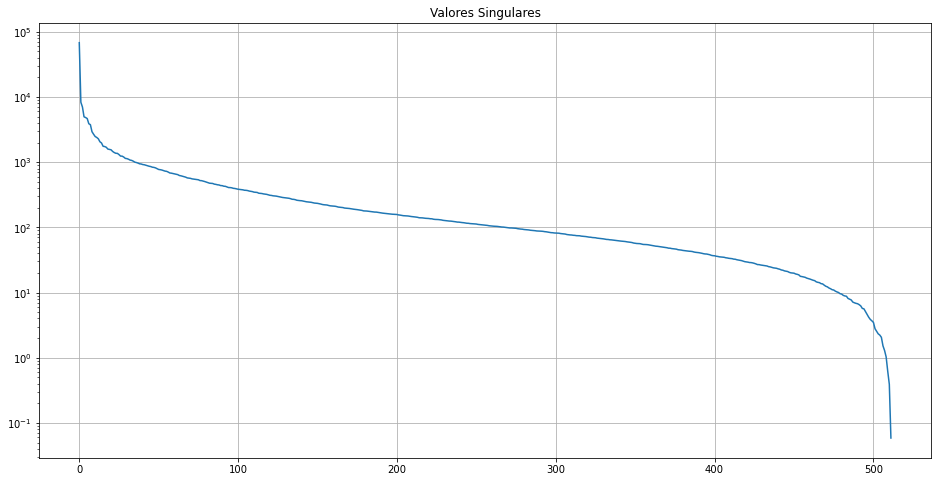

In [28]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Valores Singulares')
plt.grid()
plt.savefig(local+'valores_singulares.jpg', format='jpg')
plt.show()

Vamos imprimir na tela o maior e o menor valor singular contidos em S:

In [29]:
print("O maior valor singular em S é: ",max(np.diag(S))) 
print("O menor valor singular em S é: ",min(np.diag(S))) 

O maior valor singular em S é:  68184.17647900696
O menor valor singular em S é:  0.058631428362277416


Note que a diferença entre o maior e o menor valor singular é muito significativa. Quanto maior for um valor singular, mais importante é o autovetor correspondente a ele para a formação da imagem. Isto significa que podemos nos livrar dos autovetores associados aos menores valores singulares, sem que isso represente uma perda muito substancial na qualidade. Para verificar isso graficamente, vamos plotar a porcentagem que os i maiores valores singulares (i indo de 0 até o número de elementos em S), quando somados, representam em relação ao total de valores singulares:

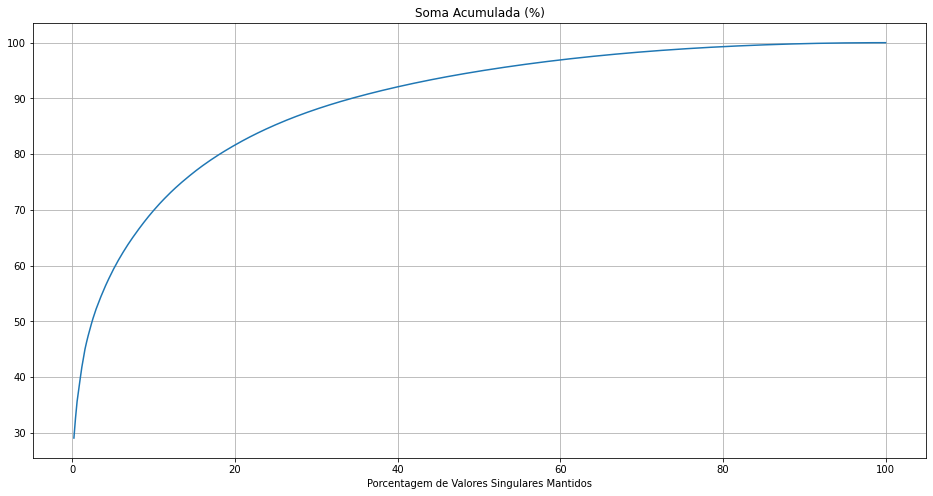

In [30]:
eixo_x = 100*np.arange(1,len(np.diag(S))+1)/len(np.diag(S))
plt.figure(2)
plt.plot(eixo_x,100*np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Soma Acumulada (%)')
plt.xlabel('Porcentagem de Valores Singulares Mantidos')
plt.grid()
plt.savefig(local+'soma_acumulada.jpg', format='jpg')
plt.show()

Note que, dependendo da imagem, um único valor singular (aquele com índice 0, ou seja, na primeira linha e primeira coluna de S) pode representar, sozinho, 20% da soma de todos os valores singulares da imagem juntos (ou até mais)!

# <a id='toc3_'></a>[Compressão](#toc0_)

Utilizando o estudo realizado na seção anterior, vamos agora efetivamente comprimir a imagem utilizando SVD. A ideia é descartar os menores valores singulares, junto com os autovetores correspondentes, de modo a armazenar menos informação.

Para averiguar o efeito da compressão de forma gradual, vamos manter uma certa porcentagem de valores singulares e descartar o restante. Iremos começar com uma porcentagem de 90% (ou seja, estamos mantendo 90% dos autovetores e valores singulares da imagem original e descartando 10%), e ir reduzindo gradualmente até chegar em uma porcentagem de 5 % (ou seja, estamos descartando 95% dos autovetores e valores singulares da imagem original). Para isso, vamos criar um array de porcentagens, arranjadas em ordem decrescente:

In [31]:
porcentagem_minima = 5
porcentagem_maxima = 90
passo = -1
porcentagens = np.arange(porcentagem_maxima,porcentagem_minima-1,passo)

Imprimindo na tela as porcentagens consideradas:

In [32]:
print("Porcentagens consideradas: \n", porcentagens)

Porcentagens consideradas: 
 [90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70 69 68 67
 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43
 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19
 18 17 16 15 14 13 12 11 10  9  8  7  6  5]


Agora, iremos realizar a compressão propriamente dita considerando cada porcentagem contida no vetor "porcentagens". Além disso, iremos salvar a imagem resultante no mesmo local em que a imagem original foi salva. Cada imagem comprimida será salva com o mesmo nome da imagem original, acrescido do sufixo "_comprimida_p", em que p é a porcentagem de valores singulares mantidos (com um zero à esquerda, se necessário).

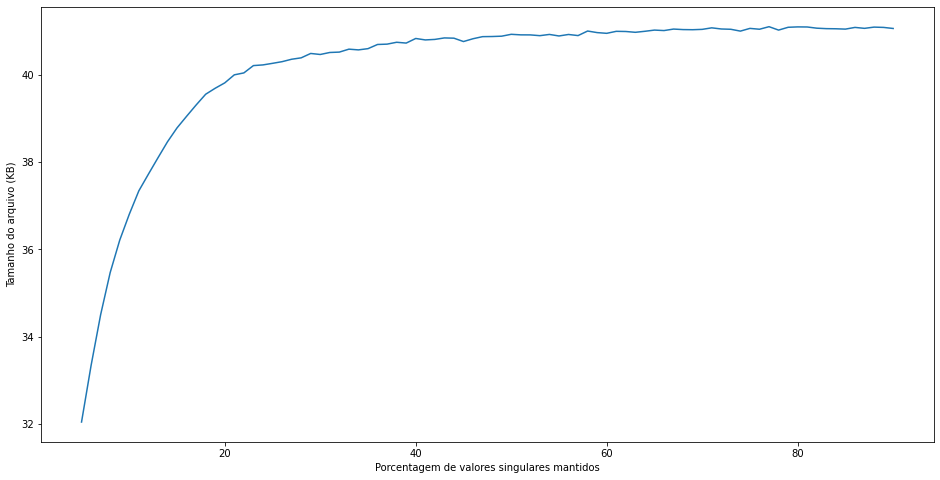

In [37]:
tamanhos_arquivos = []

#Para cada elemento p do vetor porcentagens:
for p in porcentagens:
    # Vamos calcular o número r de valores singulares a serem considerados:
    r = math.ceil(numero_total_de_valores_singulares*p/100)
    # Vamos agora, reconstruir uma aproximação para X. Nós vamos selecionar apenas as primeiras r colunas de U e as primeiras 
    # r linhas de V (bem como as linhas e colunas correspondentes de S).
    X_aproximado = U[:,:r] @ S[0:r,:r] @ V[:r,:]
    # Em seguida, vamos converter todos os elementos da matriz X_aproximado para inteiros:
    X_aproximado = X_aproximado.astype(int)
    # O código a seguir servirá para imprimir na tela a imagem correspondente à matriz X_aproximado:
    """print("Porcentagem de valores singulares mantidos: ",p,"% (porcentagem de valores singulares descartados: ",100-p,"%).")
    plt.rcParams['figure.figsize'] = [16, 8]
    plt.figure()
    img = plt.imshow(X_aproximado)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()"""
    # Especificando o nome a ser utilizado para salvar a imagem correspondente à matriz X_aproximado:
    nome_para_salvar = local + nome_do_arquivo+"_comprimida_"+f'{p:02d}'+formato
    # Gerando a imagem proprimante dita e salvando-a:
    im = Image.fromarray(X_aproximado).convert('L')
    im.save(nome_para_salvar)
    tamanhos_arquivos.append(os.path.getsize(nome_para_salvar) / 1024)

plt.plot(porcentagens, tamanhos_arquivos)
plt.xlabel("Porcentagem de valores singulares mantidos")
plt.ylabel("Tamanho do arquivo (KB)")
plt.savefig(local+'tamanho_vs_porcentagem.jpg', format='jpg')
plt.show()

Uma vez executado todo o código até aqui, responda às perguntas da Parte II da atividade.

In [43]:
import numpy as np

def autovalores_autovetores(matriz, questao):
    # Calcula os autovalores e autovetores da matriz
    autovalores, autovetores = np.linalg.eig(matriz)

    print(f"Autovalores de {questao.upper()}:")
    print(autovalores)

    print(f"Autovetores de {questao.upper()}:")
    print(autovetores)

    return autovalores, autovetores

In [39]:
import numpy as np

alpha1 = 0
alpha2 = 8
alpha3 = 1
alpha4 = 2
alpha5 = 2
alpha6 = 0
alpha7 = 0
alpha8 = 0
alpha9 = 8

a = np.array([[alpha7, alpha8], [0, alpha9]])
b = np.array([[alpha7, 0], [alpha8, alpha9]])
c = np.array([[0, alpha9+1], [alpha9+1, 0]])
d = np.array([[0, (alpha8+1)**2], [(alpha9+1)**2, 0]])
e = np.array([[alpha4, alpha5, alpha6], [0, alpha7, alpha8], [0, 0, alpha9]])
f = np.array([[2, 2, 3], [0, alpha9, 2], [0, 2, alpha9]])
g = np.array([[0, alpha6, 0], [0, alpha7, 0], [0, alpha8, alpha9+1]])

In [44]:
autovalores_autovetores(a, "a")
autovalores_autovetores(b, "b")
autovalores_autovetores(c, "c")
autovalores_autovetores(d, "d")
autovalores_autovetores(e, "e")
autovalores_autovetores(f, "f")
autovalores_autovetores(g, "g")

Autovalores de A:
[0. 8.]
Autovetores de A:
[[1. 0.]
 [0. 1.]]
Autovalores de B:
[0. 8.]
Autovetores de B:
[[1. 0.]
 [0. 1.]]
Autovalores de C:
[ 9. -9.]
Autovetores de C:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Autovalores de D:
[ 9. -9.]
Autovetores de D:
[[ 0.11043153 -0.11043153]
 [ 0.99388373  0.99388373]]
Autovalores de E:
[2. 0. 8.]
Autovetores de E:
[[ 1.         -0.70710678  0.        ]
 [ 0.          0.70710678  0.        ]
 [ 0.          0.          1.        ]]
Autovalores de F:
[ 2. 10.  6.]
Autovetores de F:
[[ 1.          0.40422604  0.17407766]
 [ 0.          0.64676167 -0.69631062]
 [ 0.          0.64676167  0.69631062]]
Autovalores de G:
[0. 0. 9.]
Autovetores de G:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


(array([0., 0., 9.]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))